# London Houses Project
---

## Introducción

PropTech, o la tecnología inmobiliaria, ofrece varios beneficios en el mercado inmobiliario. La eliminación de intermediarios y la simplificación de los procesos son dos de las principales ventajas de las proptech inmobiliarias. Esto hace que sean atractivas para el mercado y ayudan a mejorar la eficiencia y rapidez en las transacciones inmobiliarias.

Las inmobiliarias online tienen muchas ventajas, como el ahorro de tiempo y dinero. La tecnología es un ingrediente clave en estas empresas, permitiendo estrategias de marketing inmobiliario y publicidad, tours virtuales y fotografía profesional para mejorar la experiencia del usuario.

## Tabla de Contenido

1. Descargar los datos
2. Vistazo a la Base de Datos
3. Crear set de entrenamiento y prueba
4. Visualizar los Datos
5. Medir la Correlación
6. Combinación de Variables
7. Transformación de Datos
8. Manejo de texto y valores categóricos
9. Escalación de variables
10. Pipeline
11. Seleccionar y entrenar modelos
12. Afinar el modelo
13. Conclusiones

## Objetivo

Trabajamos para una proptech que quiere saber si podemos utilizar machine learning para predecir el precio de las casas, ya que el método convencional que ellos utilizan tiene un margen de error de 25%. En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [1]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas as gpd
import requests
import seaborn as sns
## Descomprimir archivos Zip
# from zipfile import ZipFile
# from io import BytesIO

## Quitar notación científica
pd.options.display.float_format = "{:,.2f}".format

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"

#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"

def extraer_datos(root, database):
  csv_path = root + database
  return pd.read_csv(csv_path)

In [3]:
df1 = extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
df2 = extraer_datos(DOWNLOAD_ROOT, LONDON_SALARY)

***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [4]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
df2 = df2.filter(['median_salary', 'area', 'date'])

In [5]:
#Filtrar los datos
df2.head()

,median_salary,area,date
0,"33,020.00",city of london,1999-12-01
1,"21,480.00",barking and dagenham,1999-12-01
2,"19,568.00",barnet,1999-12-01
3,"18,621.00",bexley,1999-12-01
4,"18,532.00",brent,1999-12-01


In [6]:
#Fusionar los dos dataframe
data = pd.merge(df2,df1)
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,NaN,1
1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,NaN,1
2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,NaN,1
3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,NaN,1
4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,NaN,1


In [7]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 95.8+ KB


En el mundo real, un dataset de 900 filas es muy poca información para un modelo de machine learning, sin embargo, debemos tomar en cuenta que solo estamos realizando un ejercicio sencillo. En cuanto a los datos nulos, lo ideal sería trabajarlos, sin embargo por ahora vamos a romper esta regla y no los vamos a tocar.

***

In [8]:
# saber que tipo de datos contiene alguna variable de tipo objeto, contado sus valores:
data['area'].value_counts()

city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
north east                21
lewisham                  21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
inner london              21
outer london              21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmith an

In [9]:
# obtener información de nuestros datos numéricos:
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


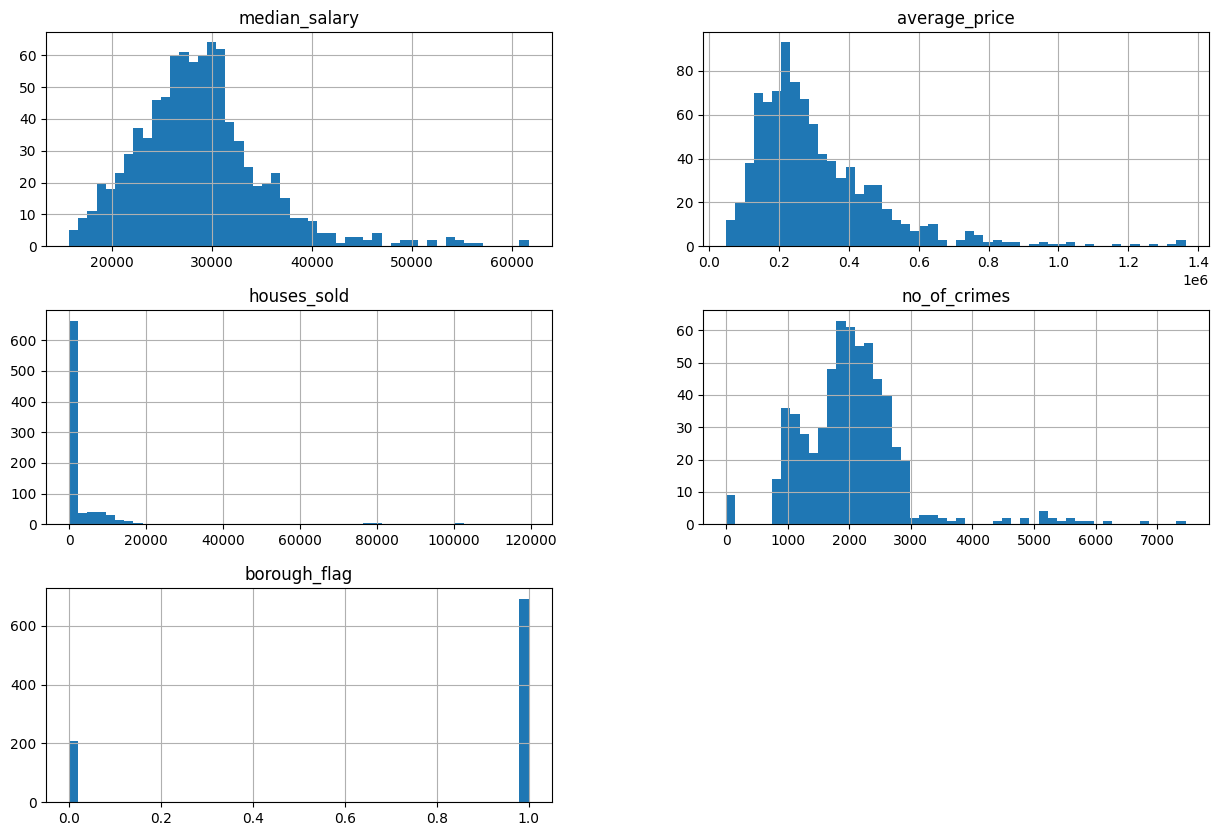

In [10]:
# Realizar un Histograma para visualizar los datos
data.hist(bins=50, figsize=(15,10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

In [11]:
# Dividir los datos train_test_split
set_ent, set_prueba = train_test_split(
    data,
    test_size = .3,
    random_state=45
    )

In [12]:
## Conformamos el tamaño de los sets
print(len(set_ent))
print(len(set_prueba))

632
271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

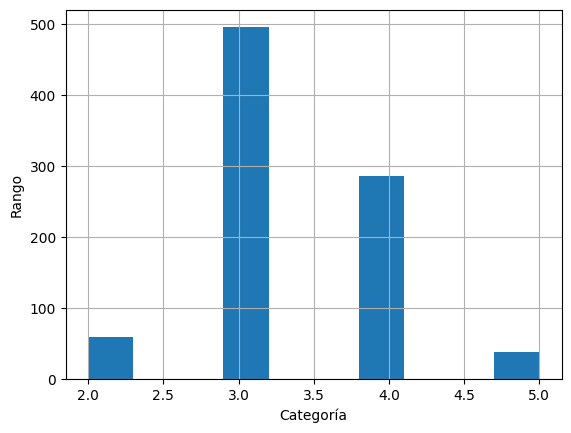

In [13]:
# Para categorizar una variable, ejemplo con 5 niveles.
data['salary_cat']=pd.cut(
                          data['median_salary'],
                          bins=[0,10000,20000,30000,40000,np.inf],
                          labels=[1,2,3,4,5]
                          )

#Hacer un histograma de las categorías
data['salary_cat'].hist()
plt.xlabel('Categoría')
plt.ylabel('Rango')
plt.show();

In [14]:
# Verificar que no existen datos en el bin #1
data['salary_cat'].value_counts()

3    496
4    287
2     59
5     39
1      0
Name: salary_cat, dtype: int64

In [15]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset=['median_salary'])
data = data.reset_index()

data['salary_cat']=pd.cut(
                          data['median_salary'],
                          bins=[10000,20000,30000,40000,np.inf],
                          labels=[1,2,3,4,]
                          )

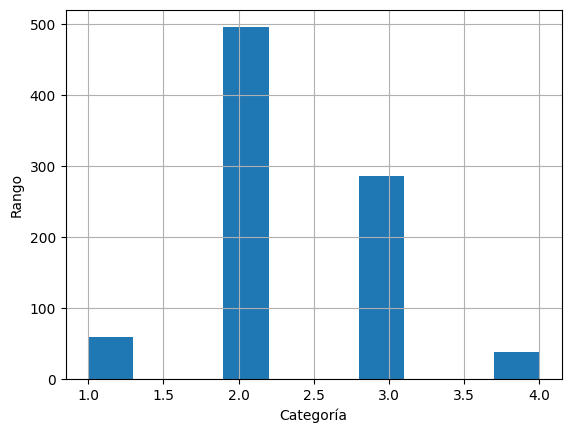

In [16]:
#Verifica que si se redefinieron las categorías
data['salary_cat'].hist()
plt.xlabel('Categoría')
plt.ylabel('Rango')
plt.show();

In [17]:
## Dividir datos basándonos en nuestras categorías de salarios
dividir = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.3,
    random_state=45
    )

In [18]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
# Creamos nuestras variables basándonos en nuestras categorías
for ent_index, prueba_index in dividir.split(data,data['salary_cat']):
  cat_set_ent = data.loc[ent_index]
  cat_set_prueba = data.loc[prueba_index]

In [19]:
# Comprobación. Ya en porcentaje
cat_set_prueba['salary_cat'].value_counts()

2    149
3     86
1     18
4     12
Name: salary_cat, dtype: int64

***

In [20]:
# Creamos dataframe para trabajar con el set de entrenamiento
df = cat_set_ent.copy()
df.head()

,index,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,151841,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,279575,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,223743,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,223141,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,262106,E09000013,255.00,NaN,1,2


***

## <span style="color:green">4. Visualizar los Datos Gráficamente </span>


Para esto vamos a necesitar, en conjunto con nuestro dataset LONDON_MAP, una nueva libreria que se llama geopandas, el cual exteiende la libreria pandas, para trabajar con datos geoespaciales, se puede encontrar más información en: https://geopandas.org/getting_started/introduction.html

In [21]:
# Cargar el mapa
# Comprobar la carga del mapa
londres_map = gpd.read_file("/content/London_Borough_Excluding_MHW.shp")
londres_map.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


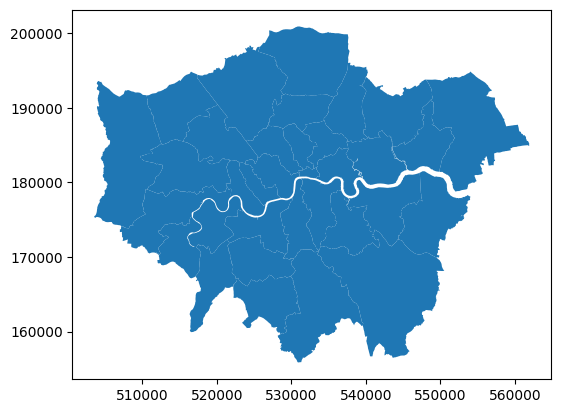

In [22]:
# Graficamos el mapa
londres_map.plot();

***

In [23]:
# Ajustamos los nombres de las columnas para despúes hacer un merge.
#utilizar lower para cambiar de mayúsculas a minúsculas
londres_map.columns = londres_map.columns.str.lower()
#Seleccionar columnas necesarias
londres_map = londres_map.rename(
                                {
                                    "name":"area",
                                    "gss_code":"code"
                                    },
                                 axis=1
                                )
londres_map["area"] = londres_map["area"].str.lower()

In [24]:
londres_map.head()

,area,code,hectares,nonld_area,ons_inner,sub_2009,sub_2006,geometry
0,kingston upon thames,E09000021,"3,726.12",0.00,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,croydon,E09000008,"8,649.44",0.00,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,bromley,E09000006,"15,013.49",0.00,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,hounslow,E09000018,"5,658.54",60.76,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,ealing,E09000009,"5,554.43",0.00,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [25]:
# Filtramos dataset
# Comprobamos filtro
londres_map = londres_map.filter(items=['area', 'code', 'hectares', 'geometry'])
londres_map.head()

,area,code,hectares,geometry
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.600 160201.800, 516407.300 16..."
1,croydon,E09000008,"8,649.44","POLYGON ((535009.200 159504.700, 535005.500 15..."
2,bromley,E09000006,"15,013.49","POLYGON ((540373.600 157530.400, 540361.200 15..."
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.800 178100.000, 521967.700 17..."
4,ealing,E09000009,"5,554.43","POLYGON ((510253.500 182881.600, 510249.900 18..."


***

In [26]:
# Seleccionar datos de nuestro set de entrenamiento
df_m = df.groupby('area').agg(
                              {
                                  'average_price':['mean'],
                                  'houses_sold':'sum',
                                  'median_salary':['mean']
                                  }
                              )

# Le asignamos nombre a las columnas del nuevo dataframe y reseteamos el indice
df_m.columns = ['average_price', 'houses_sold', 'median_salary']
df_m.reset_index(inplace=True)
df_m.head()

,area,average_price,houses_sold,median_salary
0,barking and dagenham,"182,996.43","2,937.00","28,425.43"
1,barnet,"327,315.14","6,485.00","26,764.43"
2,bexley,"215,843.00","3,976.00","26,580.08"
3,brent,"287,339.23","3,734.00","25,206.77"
4,bromley,"278,804.75","5,836.00","25,316.25"


In [27]:
# Combinar dtaframes
londres_map = pd.merge(londres_map, df_m, on="area")
londres_map.head()

,area,code,hectares,geometry,average_price,houses_sold,median_salary
0,kingston upon thames,E09000021,"3,726.12","POLYGON ((516401.600 160201.800, 516407.300 16...","318,729.36","2,376.00","27,117.45"
1,croydon,E09000008,"8,649.44","POLYGON ((535009.200 159504.700, 535005.500 15...","264,942.57","6,099.00","28,527.71"
2,bromley,E09000006,"15,013.49","POLYGON ((540373.600 157530.400, 540361.200 15...","278,804.75","5,836.00","25,316.25"
3,hounslow,E09000018,"5,658.54","POLYGON ((521975.800 178100.000, 521967.700 17...","286,041.07","3,419.00","30,362.36"
4,ealing,E09000009,"5,554.43","POLYGON ((510253.500 182881.600, 510249.900 18...","318,157.31","4,063.00","28,098.92"


***

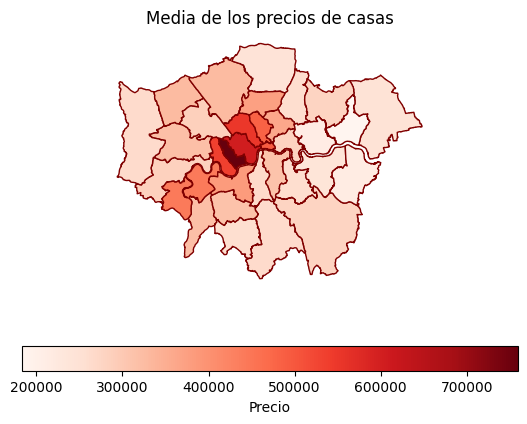

In [28]:
#Gráfica del promedio de los precios en las casas
#Cuando se grafica en geopandas hay muchos argumentos, no se desesperen si no los recuerdan, es normal.
plt = londres_map.plot(
                      column='average_price',
                      cmap='Reds',
                      edgecolor='maroon',
                      legend=True,
                      legend_kwds={
                                    'label':'Precio',
                                    'orientation':'horizontal'
                                    }
                      )
plt.set_title('Media de los precios de casas')
plt.axis('off');

💸: Los precios son mayores en el centro de la cuidad

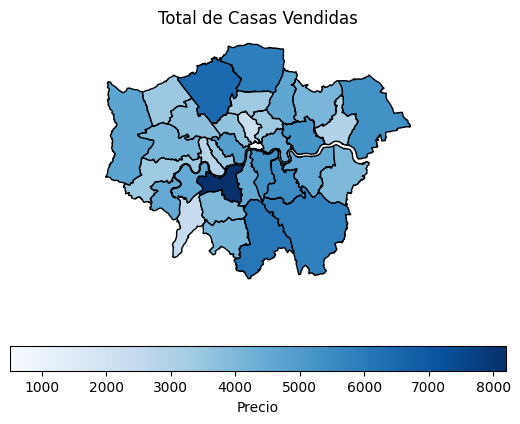

In [29]:
#Graficar ahora el total de las casa vendidas (utilizar el código anterior para no repetir)
plt = londres_map.plot(
                      column='houses_sold',
                      cmap='Blues',
                      edgecolor='black',
                      legend=True,
                      legend_kwds={
                                    'label':'Precio',
                                    'orientation':'horizontal'
                                    }
                      )
plt.set_title('Total de Casas Vendidas')
plt.axis('off');

Las casas en el norte y sur son de las más vendidas, el centro es el top de ventas.

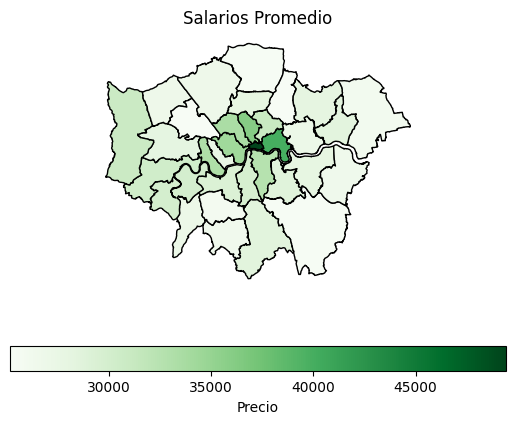

In [30]:
plt = londres_map.plot(
                      column='median_salary',
                      cmap='Greens',
                      edgecolor='black',
                      legend=True,
                      legend_kwds={
                                    'label':'Precio',
                                    'orientation':'horizontal'
                                    }
                      )
plt.set_title('Salarios Promedio')
plt.axis('off');

Las personas que más ingresos generan viven en la zona centro.

***

## <span style="color:green">5. Medir la Correlación </span>


In [31]:
# Crear matriz de correlación
matriz = df.corr(method="pearson")
# Comparar correlación
matriz['average_price'].sort_values(ascending=False)

<ipython-input-31-9e8b42e7f180>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr(method="pearson")


average_price    1.00
median_salary    0.65
index            0.56
borough_flag     0.33
no_of_crimes     0.17
houses_sold     -0.19
Name: average_price, dtype: float64

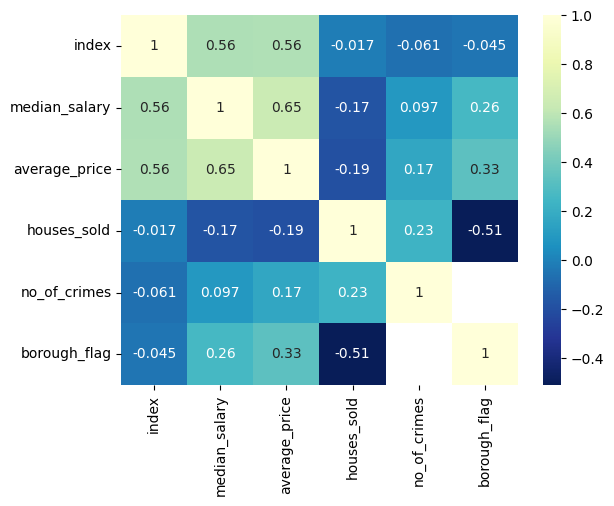

In [32]:
# Crear vector
# Graficar
plt = sns.heatmap(
    matriz,
    annot=True,
    cmap="YlGnBu_r"
    )

Existe una buena correlación entre el precio de las casas y el salario promedio mientras que el número de crimenes presenta una correlación débil en el precio de una casa.

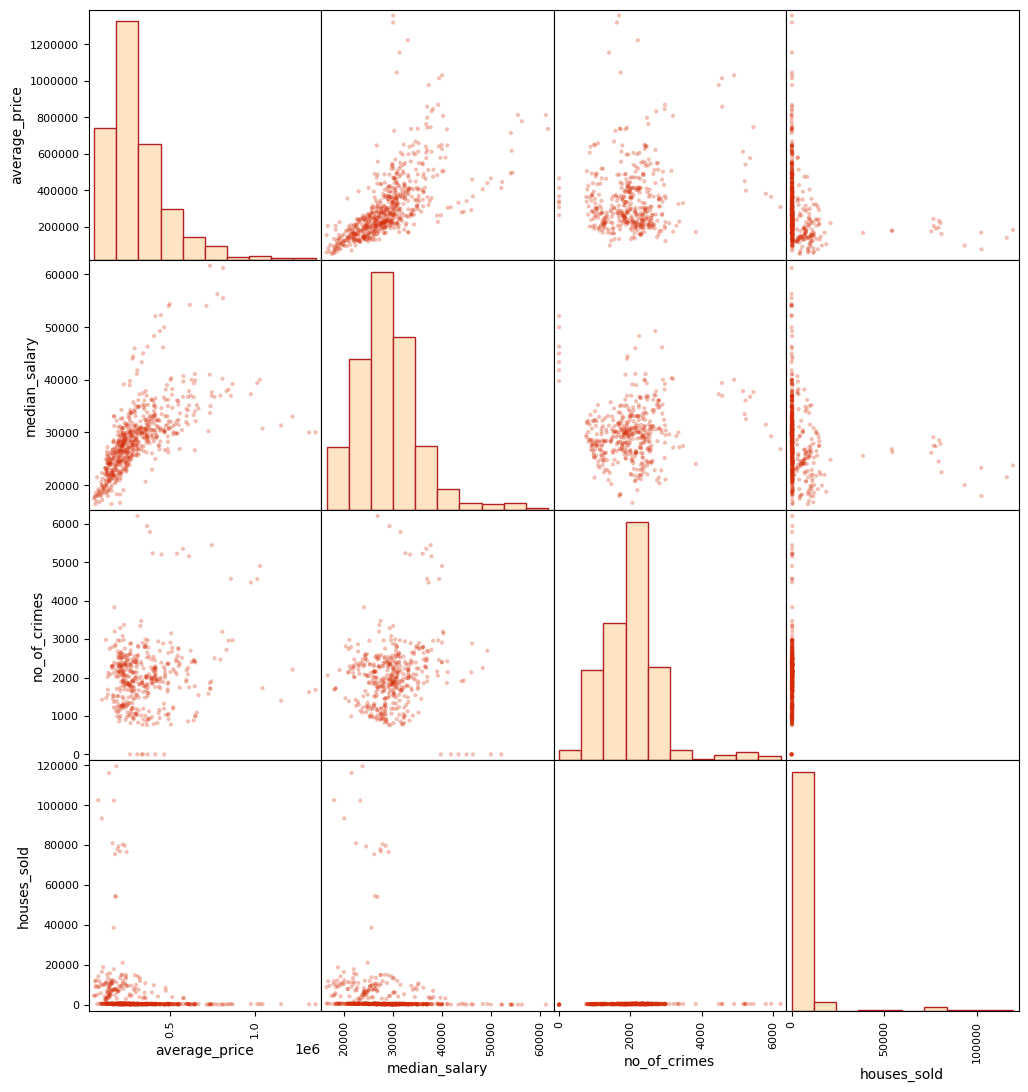

In [33]:
#Para graficar scatter_matrix...
columns = ["average_price", "median_salary", "no_of_crimes", "houses_sold"]
scatter_matrix(
    df[columns],
    figsize=(12,13),
    color="#D52B06",
    alpha=0.3,
    hist_kwds={
        'color':['bisque'],
        'edgecolor':'firebrick'
        }
    );

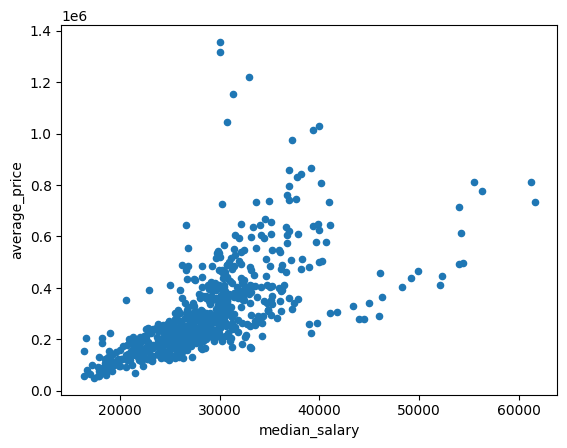

In [34]:
#Por si quieren ver una gráfica en específico más a detalle
df.plot(kind='scatter', x='median_salary', y='average_price');

***

## <span style="color:green">6. Combinación de Variables </span>


In [35]:
#Armar una columna para hacer las combinaciones que necesitamos
df["Vendidas_Población"]=df["no_of_crimes"]/df['houses_sold']
# Crear matriz de correlación
matriz = df.corr(method="pearson")
matriz['average_price'].sort_values(ascending=False)

<ipython-input-35-843ffe825380>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr(method="pearson")


average_price         1.00
median_salary         0.65
index                 0.56
Vendidas_Población    0.33
borough_flag          0.33
no_of_crimes          0.17
houses_sold          -0.19
Name: average_price, dtype: float64

***

## <span style="color:Blue">7. Transformación de Datos </span>


In [36]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_ent['average_price']
#Nuevo dataframe sin average_price
df_label.head()

323    151841
424    279575
560    223743
481    223141
53     262106
Name: average_price, dtype: int64

In [37]:
# Df train
df = cat_set_ent.drop(
                      'average_price',
                      axis=1
                      )
df.head()

,index,median_salary,area,date,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,E09000013,255.00,NaN,1,2


***

#### Transformación Pandas

In [38]:
df.isna().sum()

index              0
median_salary      0
area               0
date               0
code               0
houses_sold       27
no_of_crimes     193
borough_flag       0
salary_cat         0
dtype: int64

In [39]:
# Quitar número de crímenes
df = df.drop('no_of_crimes', axis=1)

In [40]:
df.head()

,index,median_salary,area,date,code,houses_sold,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,E12000004,"10,413.00",0,2
424,438,"28,234.00",ealing,2009-12-01,E09000009,312.00,1,2
560,574,"28,326.00",havering,2012-12-01,E09000016,231.00,1,2
481,495,"30,806.00",lewisham,2010-12-01,E09000023,242.00,1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,E09000013,255.00,1,2


In [41]:
#Tomamos la media
median = df['houses_sold'].median()
df['houses_sold'].fillna(median, inplace=True)
df.isna().sum()

index            0
median_salary    0
area             0
date             0
code             0
houses_sold      0
borough_flag     0
salary_cat       0
dtype: int64

#### Transformación Scikit

In [42]:
# Df train
df = cat_set_ent.drop(
                      'average_price',
                      axis=1
                      )

***

In [43]:
imputer = SimpleImputer(strategy='median')

df = df.drop(
     'no_of_crimes', axis=1
     )
df_num = df.drop(
    ['area', 'date', 'code'],
    axis=1
    )

imputer.fit(df_num)
X = imputer.transform(df_num)

df_tr = pd.DataFrame(
    X, columns=df_num.columns, index=df_num.index
    )

print(df_tr.head())
print('valores ausentes')
print(df_tr.isna().sum())

     index  median_salary  houses_sold  borough_flag  salary_cat
323 336.00      21,946.00    10,413.00          0.00        2.00
424 438.00      28,234.00       312.00          1.00        2.00
560 574.00      28,326.00       231.00          1.00        2.00
481 495.00      30,806.00       242.00          1.00        3.00
53   55.00      25,264.00       255.00          1.00        2.00
valores ausentes
index            0
median_salary    0
houses_sold      0
borough_flag     0
salary_cat       0
dtype: int64


***

## <span style="color:Blue">8. Manejo de texto y valores categóricos </span>

In [44]:
#definir que variable vamos a cambiar a valor numérico
df_cat = df[['area']]
ordinal_encoder = OrdinalEncoder()
df_oe = ordinal_encoder.fit_transform(df_cat)
ordinal_encoder.categories_

[array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
        'camden', 'city of london', 'croydon', 'ealing', 'east midlands',
        'enfield', 'england', 'greenwich', 'hackney',
        'hammersmith and fulham', 'haringey', 'harrow', 'havering',
        'hillingdon', 'hounslow', 'inner london', 'islington',
        'kensington and chelsea', 'kingston upon thames', 'lambeth',
        'lewisham', 'london', 'merton', 'newham', 'north east',
        'north west', 'outer london', 'redbridge', 'richmond upon thames',
        'south east', 'south west', 'southwark', 'sutton', 'tower hamlets',
        'waltham forest', 'wandsworth', 'west midlands', 'westminster'],
       dtype=object)]

In [45]:
#ONE HOT ENCODER, Convertir variables categóricas en binarias
encoder = OneHotEncoder()
df_1hot = encoder.fit_transform(df_cat)
df_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

***

## <span style="color:Blue">9. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [46]:
#Importar MinMaxScaler
scaler = MinMaxScaler()
prueba = pd.DataFrame(
    {'col1': [100,200,300,999],
     'col2': [0,0,1,2],
     'col3':[-10,0,1,2]
     }
    )
pd.DataFrame(scaler.fit_transform(prueba), columns=prueba.columns)

,col1,col2,col3
0,0.00,0.00,0.00
1,0.11,0.00,0.83
2,0.22,0.50,0.92
3,1.00,1.00,1.00


#### <span style="color:Blue">9.2 Estandarización </span>

In [47]:
## Estandarización (Es el más ultizado)
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(prueba), columns=prueba.columns)

,col1,col2,col3
0,-0.85,-0.90,-1.71
1,-0.57,-0.90,0.36
2,-0.28,0.30,0.57
3,1.70,1.51,0.78


***

## <span style="color:Blue">10. Pipeline </span>


In [48]:
# Crear función de pipeline
pipeline = Pipeline([
    ('rellenar', SimpleImputer(strategy='median')),
    ('escalar', StandardScaler())
])
pd.DataFrame(
    pipeline.fit_transform(
        prueba
        ),
          columns=prueba.columns
    )

,col1,col2,col3
0,-0.85,-0.90,-1.71
1,-0.57,-0.90,0.36
2,-0.28,0.30,0.57
3,1.70,1.51,0.78


In [49]:
# Aplicando Column Transformer
num = list(df_num)
cat = list(df_cat)

#Hacer un datframe que usaremos para la regresión lineal
pipeline_completo = ColumnTransformer([
    ('num', pipeline, num),
    ('cat', OneHotEncoder(), cat)
])

#Visualiza los datos
df_preparado = pipeline_completo.fit_transform(df)
df_preparado

<616x48 sparse matrix of type '<class 'numpy.float64'>'
	with 3696 stored elements in Compressed Sparse Row format>

In [50]:
df_preparado.toarray()

array([[-0.46933763, -1.05081372,  0.47008784, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07015764, -0.09504471, -0.27092311, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46208235, -0.08106081, -0.27686528, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.02319528, -0.20706789, -0.27759888, ...,  0.        ,
         0.        ,  0.        ],
       [-0.45759704, -0.61731289,  1.24667847, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.58135173,  4.98202216, -0.26820878, ...,  0.        ,
         0.        ,  0.        ]])

***

## <span style="color:purple">11. Seleccionar y entrenar modelos </span>

In [51]:
## Hacer Regresión Lineal
reg_lin = LinearRegression()
reg_lin.fit(df_preparado, df_label)

LinearRegression()

In [52]:
#Análisis preambultario de los errores
algunos_datos = df.iloc[:5]
dato_predecir = df_label.iloc[:5]

datos_transformados = pipeline_completo.transform(algunos_datos)

In [53]:
vp = reg_lin.predict(datos_transformados)

In [54]:
vr = list(dato_predecir)

In [55]:
vp = pd.Series(vp)
vr = pd.Series(vr)

In [56]:
vr-vp

0    54,407.02
1   -28,358.23
2   -64,504.45
3   -40,396.85
4   -91,200.13
dtype: float64

In [57]:
abs((vr-vp)/vr).mean()

0.25540695433299987

***

#### <span style="color:purple">11.1 RMSE </span>

In [58]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE
prediccion = reg_lin.predict(df_preparado)
error = mean_squared_error(df_label, prediccion)
error = np.sqrt(error)
error

68741.64383385229

In [59]:
#Sacar el promedio
df_label.mean()

307807.6574675325

In [60]:
#Calcular el porcentaje de acierto
error / df_label.mean()

0.22332662026480984

***

#### <span style="color:purple">11.2 Árbol de Decisión </span>

In [61]:
# importar DecisionTreeRegressor
reg_arbol = DecisionTreeRegressor()
reg_arbol.fit(df_preparado,df_label)

#calcular el error
prediccion = reg_arbol.predict(df_preparado)
error = mean_squared_error(df_label, prediccion)
error = np.sqrt(error)
error

0.0

Este cero no significa un excelente resultado, más bien parece un problema de **overfitting**

***

#### <span style="color:purple">11.3 Validación Cruzada </span>


In [62]:
#Importar cross_val_score, creo objeto, corro mi función
resultados = cross_val_score(
    reg_arbol,
    df_preparado,
    df_label,
    scoring='neg_mean_squared_error',cv=10
    )

In [63]:
#Calcular el porcentaje de acierto de validación cruzada
rmse = np.sqrt(-resultados)
rmse

array([91145.36607017, 67117.45207422, 76225.66246223, 66003.86364827,
       89163.94639724, 99230.71825817, 55951.91396293, 58861.37967278,
       67286.2084311 , 75671.2687048 ])

In [64]:
rmse.mean()

74665.77796819029

***

#### <span style="color:purple">11.4 Bosque Aleatorio </span>
¡Este también es importante!

In [65]:
#Importar RandomForestRegressor, creo objeto, corro mi función
reg_forest = RandomForestRegressor()
reg_forest.fit(df_preparado,df_label)
#calcular el error
prediccion = reg_forest.predict(df_preparado)

In [66]:
#Calcular el el promedio de la suma de los errores al cuadrado
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

20368.17771684191

In [67]:
#Calcular el porcentaje de acierto de bosque aleatorio
error / df_label.mean()

0.06617177065840327

In [68]:
resultados = cross_val_score(
    reg_forest,
    df_preparado,
    df_label,
    scoring='neg_mean_squared_error',
    cv=10)
rmse = np.sqrt(-resultados)
rmse

array([68678.51242585, 53574.76544619, 56547.66239462, 68889.82004679,
       64711.64277628, 62413.43065093, 58255.61776603, 48995.69829415,
       52409.44364022, 51478.47579169])

In [69]:
rmse.mean()

58595.50692327558

In [70]:
rmse.mean()/df_label.mean()

0.1903640325434601

***

## <span style="color:purple">12. Afinar el modelo </span>

### <span style="color:purple">12.1 Grid Search</span>

In [71]:
param_grid = ({
    'n_estimators':[3,10,10],
    'max_features':[2,4,6,8]
})

grid_search = GridSearchCV(
    reg_forest,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
    )

grid_search.fit(df_preparado,df_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [73]:
np.sqrt(-grid_search.best_score_)/df_label.mean()

0.19211449286218804

### <span style="color:purple">12.2 set de prueba</span>

In [74]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte
modelo_final = grid_search.best_estimator_
modelo_final

RandomForestRegressor(max_features=2, n_estimators=10)

In [75]:
Y = cat_set_prueba['average_price']
X = cat_set_prueba.drop('average_price',axis=1)

In [76]:
X = X.drop('no_of_crimes', axis=1)
X

,index,median_salary,area,date,code,houses_sold,borough_flag,salary_cat
158,164,"19,125.00",east midlands,2002-12-01,E12000004,"9,098.00",0,1
767,783,"29,134.00",enfield,2017-12-01,E09000010,225.00,1,2
93,97,"24,095.00",hackney,2001-12-01,E09000012,252.00,1,2
578,592,"23,781.00",north east,2012-12-01,E12000001,"2,354.00",0,2
130,136,"22,675.00",croydon,2002-12-01,E09000008,661.00,1,2
...,...,...,...,...,...,...,...,...
778,794,"31,308.00",kingston upon thames,2017-12-01,E09000021,154.00,1,3
56,58,"17,418.00",havering,2000-12-01,E09000016,321.00,1,1
606,620,"37,325.00",islington,2013-12-01,E09000019,294.00,1,3
819,836,"32,976.00",kensington and chelsea,2018-12-01,E09000020,84.00,1,3


In [77]:
X_preparada = pipeline_completo.transform(X)
prediccion_final = modelo_final.predict(X_preparada)

In [78]:
mse_final = mean_squared_error(Y, prediccion_final)
rmse = np.sqrt(mse_final)

In [79]:
# Porcentaje de acierto
print(rmse)
print(rmse/Y.mean())

64283.323585861996
0.20271096337269354


## Conclusiones

En resumen, este proyecto de machine learning ha logrado un avance significativo al reducir el error en la predicción de precios de viviendas de un 25% a un 20%.

Esta mejora sustancial refleja el impacto positivo de las técnicas y modelos implementados, lo que demuestra el potencial de la **inteligencia artificial** para optimizar la precisión en la valoración de bienes raíces. Este resultado no solo beneficia a los profesionales del sector inmobiliario, sino también a los compradores y vendedores al proporcionar estimaciones más confiables y útiles para la toma de decisiones.